C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

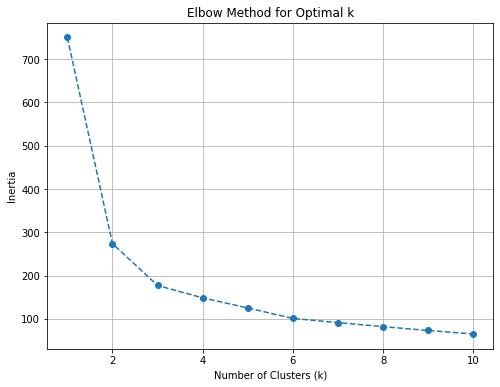

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
data = pd.read_csv('iris.csv')

# Extract the features (exclude the 'Species' column)
X = data.drop('Species', axis=1)

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use the Elbow method to find the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



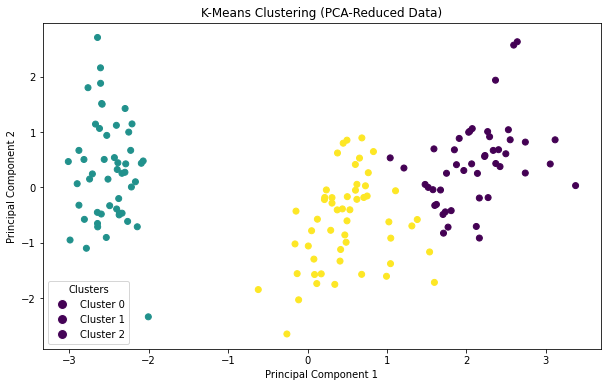

In [3]:
# Based on the Elbow method, let's choose the optimal number of clusters (k)
optimal_k = 3  # You can adjust this based on the Elbow method graph

# Fit K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clustered data (using PCA for dimensionality reduction)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=f'Cluster {i}') for i, c in enumerate(scatter.get_cmap()(range(optimal_k)))]
plt.legend(handles=legend_labels, title='Clusters')

plt.show()